In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Verificar si entidades con mayor densidad de habitantes consumen agua. Una primera gráfica sería el gasto de agua per cápita por alcaldia. Otras serían a mayor poblacion más gasto domestico. ¿Y qué tal el gasto no domestico

In [2]:
df = pd.read_csv("data_consumo_agua.csv")
df.head(10)

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24000,631.00,42.066667,3.050000,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00000,115.13,28.782500,7.320000,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00000,197.96,32.993333,75.030000,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00000,253.53,84.510000,84.510000,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72000,839.35,76.304545,121.570000,3,243.14,57330,bajo,19.474161,-99.146750
5,439.77,2019,Azcapotzalco,35.675769,927.57,azcapotzalco,trabajadores del hierro,54.97125,1399.67,37.828919,10.776667,3,32.33,57273,bajo,19.478613,-99.150571
6,991.80,2019,Azcapotzalco,22.381884,4633.05,azcapotzalco,barrio coltongo,123.97500,7693.64,33.305801,129.299375,3,2068.79,57275,bajo,19.480211,-99.152316
7,0.00,2019,Azcapotzalco,0.000000,0.00,azcapotzalco,barrio coltongo,0.00000,305.00,152.500000,152.500000,3,305.00,57276,popular,19.479096,-99.148920
8,184.86,2019,Azcapotzalco,33.661176,1716.72,azcapotzalco,trabajadores del hierro,46.21500,1903.66,33.993929,2.080000,3,2.08,57277,bajo,19.478585,-99.148847
9,10.98,2019,Azcapotzalco,51.912500,207.65,azcapotzalco,trabajadores del hierro,10.98000,237.54,29.692500,6.303333,3,18.91,57281,bajo,19.477273,-99.147921


In [3]:
habitantes_df = df[['consumo_total','alcaldia','consumo_total_dom',\
                    'consumo_total_no_dom']].groupby(['alcaldia'], as_index=False)\
.sum().sort_values(by=['consumo_total'], ascending=False)

habitantes_df.head()

,alcaldia,consumo_total,consumo_total_dom,consumo_total_no_dom
5,cuauhtemoc,18650818.44,1.034611e+07,6074370.831
10,miguel hidalgo,14490397.15,8.640463e+06,4687309.460
2,benito juarez,13780118.64,9.894931e+06,2815269.571
6,gustavo a. madero,13480100.57,9.196449e+06,2740658.660
0,alvaro obregon,9608502.55,6.590161e+06,2492864.010


In [4]:
df_alc = pd.read_csv('alcaldias.csv')

col_names = df_alc.columns.to_list()
col_name = []
for i in range(len(col_names)):
    col_name.append(col_names[i].replace(" ", "").lower())
df_alc.columns =col_name

df_alc['alcaldia'] = df_alc['alcaldia'].str.lower()

df_alc['alcaldia'] = habitantes_df['alcaldia']

df_alc.drop(['clave'], axis = 1, inplace = True)

hab = pd.merge(habitantes_df, df_alc, how ='left', on ='alcaldia')\
.sort_values(by=['consumo_total'], ascending=False)

hab['gasto_per_capita'] = hab['consumo_total']/hab['habitantes']

hab

FileNotFoundError: [Errno 2] No such file or directory: 'alcaldias.csv'

¿Las alcaldias con mayor numero de habitantes tienen un mayor consumo de agua?

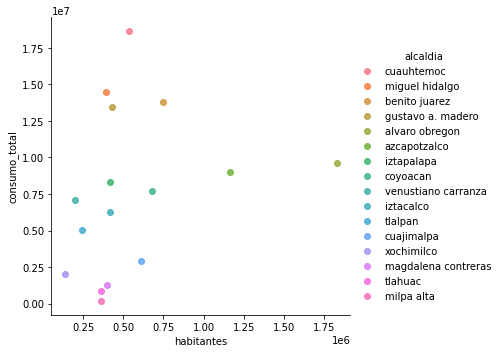

In [73]:
sns.lmplot( x="habitantes", y="consumo_total",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True)
#sns.plt.show()

Los datos de habitantes por alcaldia fueron tomados del senso realizado por el inegi en 2015, que son los datos que le corresponden al dataset con el que estamos trabajando.

Como vemos, los datos no presentan relación alguna, lo que nos no dice que no existe  algun nexo entre el numero de habitantes con el consumo total por alcaldia. 

¿Y entre consumo domestico total y población existe alguna relación?

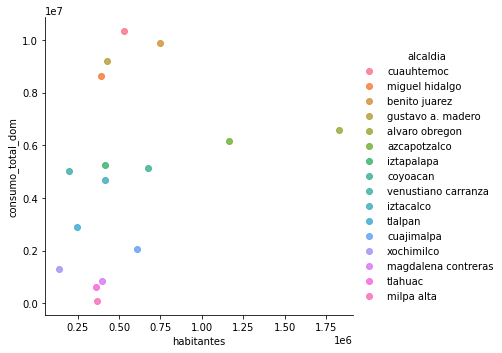

In [79]:
sns.lmplot( x="habitantes", y="consumo_total_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True)

cant de habitantes vs la cantidad de datos por alcaldía, cant. habitatntes vs índice por alcaldía